# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

#### 1. Импортирем библиотеки. Считываем данные из csv-файла в датафрейм и сохраняем в переменную `df`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

#### 2. Изучаем общую информацию о полученном датафрейме.

In [3]:
#Выведем первые 15 сток
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Выведем основную информацию о датафрейме с помощью метода info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### 3. Построим общую гистограмму для всех числовых столбцов таблицы.

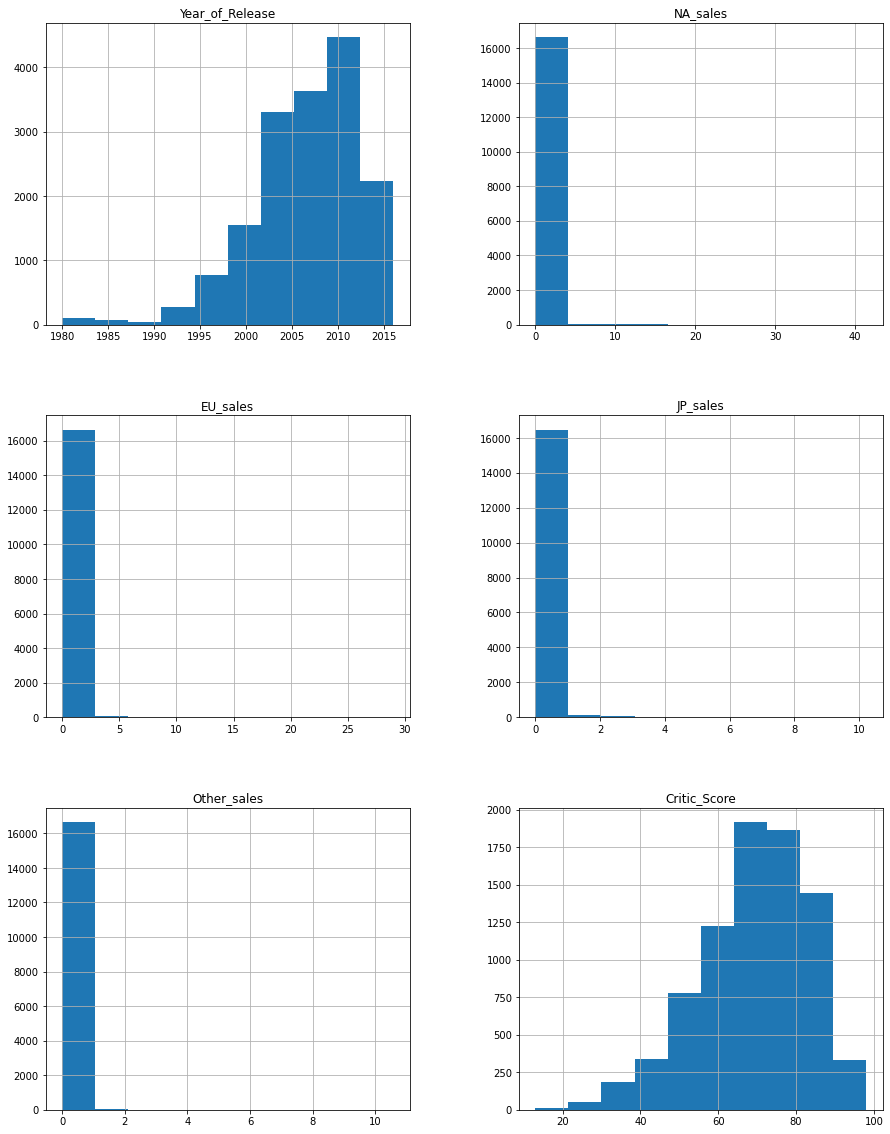

In [5]:
df.hist(figsize=(15, 20))
plt.show()

#### 4. Проверим датасет на дубликаты.

In [6]:
df.duplicated().sum()

0

**На этапе ознакомления с данными:**
1. Импрортировали библиотеки pandas, matplotlib, numpy.
2. Изучили первые 15 строк и основную информацию датафрейма.
3. Построили общие гистограммы для всех числовых столбцов таблицы.
4. Проверили датасет на дубликаты.

### Шаг 2. Предобработка данных

#### 1. Замените названия столбцов (приведите к нижнему регистру)

In [7]:
#Воспользуемся методом str.lower() для названий столбцов
df.columns = df.columns.str.lower()

In [8]:
#проверим
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### 2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [9]:
#Рассмотрим типы данных в каждом столбце методом info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
#Переведем year_of_release в int
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [11]:
#Переведем user_score в float
#для начала нужно перевести значения tbd в np.Nan
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype(float)

In [12]:
#проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### 3. Обработайте пропуски при необходимости

In [13]:
#проверим пропуски методом isna().sum()
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

*значения в name, genre, year_of_release можно удалить, так как конкретно узать название игры, жанр и год выпуска нельзя. Пропуски, здесь возникли, скорее всего, по причине того, что название, жанр и год выпуска еще не утверждены, либо их просто забыли заполнить.*

In [14]:
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)

*заполнение оценок пользователей и критиков в user_score, critic_score добавит "шума" в данные, поэтому пропуски стоит сохранить.*

*Пропуски в значениях critic_score, user_score, скорее всего, возникли по причине того, что игра выпущена недавно и оценки еще не сформированы, либо потому, что ирга не популярна и ее никто не оценил.*

In [15]:
df.pivot_table(index = ['rating', 'genre'], values = 'name', aggfunc = 'count')

name
rating genre             
AO     Action           1
E      Action         410
       Adventure      159
       Fighting         8
       Misc           449
       Platform       354
       Puzzle         284
       Racing         576
       Role-Playing    83
       Shooter         47
       Simulation     321
       Sports        1162
       Strategy        68
E10+   Action         468
       Adventure       67
       Fighting        19
       Misc           166
       Platform       141
       Puzzle          42
       Racing          95
       Role-Playing   111
       Shooter         56
       Simulation      47
       Sports         105
       Strategy        76
EC     Action           1
       Adventure        2
       Misc             5
K-A    Misc             1
       Strategy         2
M      Action         596
       Adventure       98
       Fighting        48
       Misc            13
       Platform         3
       Racing          18
       Role-Playing   161
       Shooter        553
       Simulation       5
       Sports          16
       Strategy        25
RP     Strategy         1
T      Action         670
       Adventure      114
       Fighting       357
       Misc           228
       Platform        63
       Puzzle          10
       Racing         167
       Role-Playing   415
       Shooter        340
       Simulation     186
       Sports         195
       Strategy       160

*Здесь мы видим, что есть очень малые группы значения рейтинга, они составляют пренебрежимо малую долю, их можно удалить.*

*Пропусков в столбце rating дастаточно много, удалить их нельзя, и определить точно возрастную группу тоже нельзя. Поэтому пропуски в этом столбце будем заменять на "неопределен"*

In [16]:
#избавимся от редких значений
df = df.loc[df['rating'] != ('K-A', 'RP', 'EC', 'AO')]

In [17]:
df['rating'] = df['rating'].fillna('неопределен')

In [19]:
#Проверим пропуски
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

#### 4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [20]:
df['sum_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [21]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,неопределен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,неопределен,31.38


**На стадии предобработки данных мы:**

1. Перевели названия столбцов в нижний регистр
2. Изменили типы данных в столбцах:

    -year_of_release в int64. Так как в столбце был пропуски, перевод в обычный int вызывал ошибку;
 
    -user_score в float, однако в этом столбце были значения "tbd". Они означают, что человек еще в раздумьях какую оценку нужно поставить. Поэтому значения "tbd" были заменены на NaN.
3. Обработали пропуски в столбцах:

    -name, genre, year_of_release были удалены, так как точно их заполнить невозможно. Пропусков было немного, так что на точность данных это не повлияет;
    
    -заполнение оценок пользователей и критиков в user_score, critic_score добавит "шума" в данные, поэтому пропуски в них мы сохранили.
    
    -в столбце rating удалили очень редкие значения, которые составляют пренебрежимо малую долю в данных;
    
    -rating заполнили значением "неопределен", так как возрастную группу определить точно нельзя.
    
4. Создали столбец sum_sales в котором находится суммарная продажа во всех регионах.


### Шаг 3. Исследовательский анализ данных

#### 1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [22]:
df.pivot_table(index = 'year_of_release', values = 'name', aggfunc= 'count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


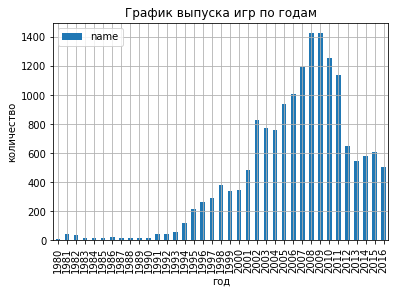

In [23]:
df.pivot_table(index = 'year_of_release', values = 'name', aggfunc= 'count').plot(kind = 'bar', grid = True)
plt.title('График выпуска игр по годам')
plt.ylabel('количество')
plt.xlabel('год')
plt.show()

*В быстроразвивающейся сфере, как компьютереные игры, тренды быстро приходят и уходят, для дальнейшего анализа нам потребуются самые актуальные данные(последние 4-5 лет).*

#### 2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [24]:
df.pivot_table(index = ['platform'], values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'], aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
platform,,,,,
PS2,332.63,137.54,572.92,190.47,1233.56
X360,268.32,12.30,595.74,84.88,961.24
PS3,327.21,79.41,390.13,134.59,931.34
Wii,258.32,68.28,486.87,77.71,891.18
DS,188.41,175.02,380.31,59.04,802.78
PS,212.39,139.78,334.72,40.69,727.58
PS4,141.09,15.96,108.74,48.35,314.14
GBA,74.59,46.56,184.12,7.61,312.88
PSP,65.62,75.88,107.27,40.76,289.53


In [25]:
#выберем топ-10 платформ за все время
df_top_platform = df.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']")

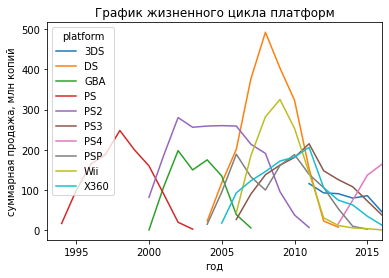

In [26]:
df_top_platform.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'count').plot()
plt.title('График жизненного цикла платформ')
plt.ylabel('суммарная продажа, млн копий')
plt.xlim([1993, 2016])
plt.xlabel('год')
plt.show()

*Жизненный цикл платформ можно определить, как 6-10 лет. Причем, пика продаж платформы достигают за первые 2-4, а дальше продажи падают в нулевые значения.*

#### 3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

*Исходя из вывода о жизненном цикле платформ, для дальнейшего анализа нам потребуются данные за последние 5 лет, остальные данные можно считать не актуальными для прогноза.*

In [27]:
#на всякий случай сохраним исходную таблицу в переменную df_all
df_all = df
df = df.loc[df['year_of_release'] >= 2012]

#### 4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

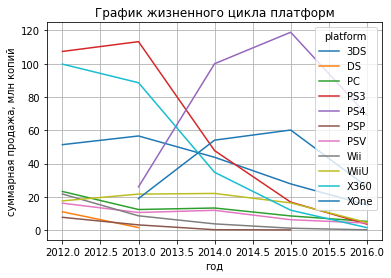

In [28]:
df.pivot_table(index = ['year_of_release'], columns = ['platform'], values = 'sum_sales', aggfunc = 'sum').plot(grid = True)
plt.title('График жизненного цикла платформ')
plt.ylabel('суммарная продажа, млн копий')
plt.xlabel('год')
plt.show()

In [29]:
df.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)

,sum_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


*к 2016 году "на плаву" платформы PS4 и XOne. Однако стоит отметить, что все все плафтормы по прадажам стремятся вниз. Оставим такой топ-10, не будем его уменьшать.*

#### 4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

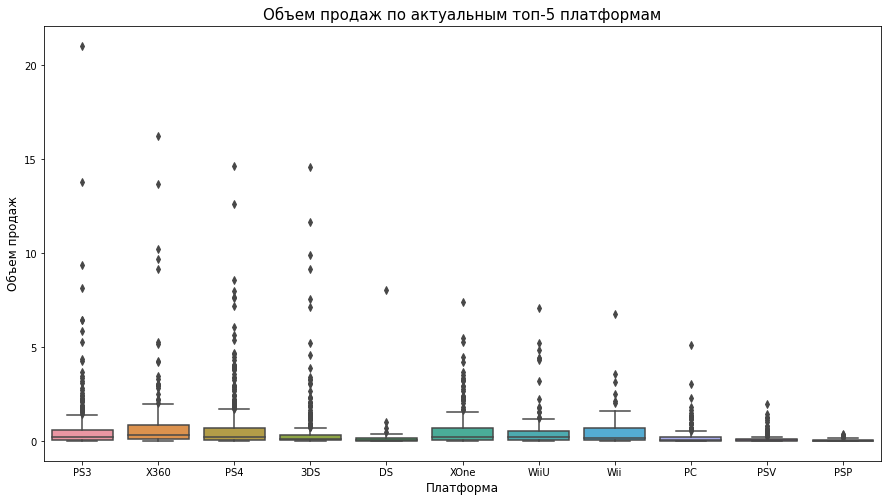

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='platform', y='sum_sales');
plt.title('Объем продаж по актуальным топ-5 платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Объем продаж',fontsize=12)
plt.show()


*Диаграмма размаха показывает нам выбивающиеся значения по каждой платформе, однако этими выбросами можем пренебреч или считать их достоверными, так как они, скорее всего, показывают нам очень ожидаемые игры, которые выходят именно для данных платформ.*

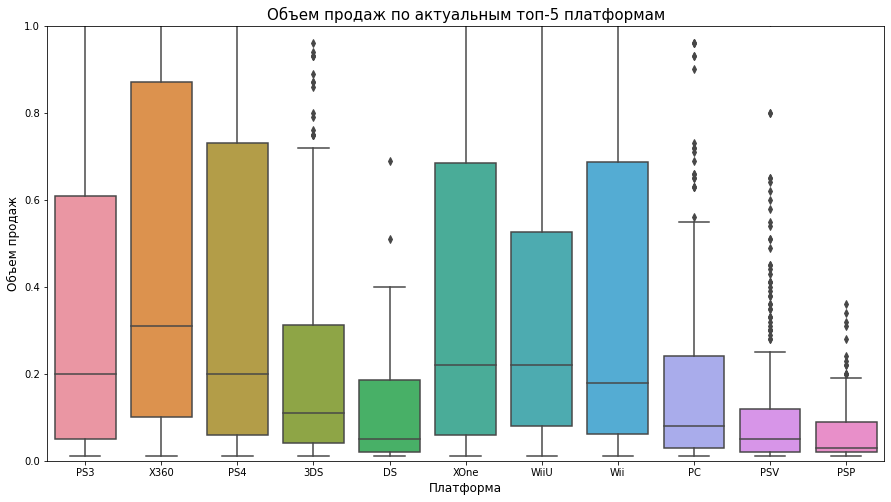

In [31]:
#Сделаем дополнительную диаграмму размаха, которая покажет нижнюю часть диаграмм размаха
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='platform', y='sum_sales');
plt.ylim(0, 1)
plt.title('Объем продаж по актуальным топ-5 платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Объем продаж',fontsize=12)
plt.show()

*по данным за последние 5 лет, **лучшим считается X360, его медиана и 75% процентиль имеет наибольшее значение**. Далее можно отметить топ-5 платформ:*

    - с наибольшей медианой - это Xone, WiiU, PS4, PS3;
    - с наибольшим 75% процентилем - PS4, XOne, Wii, PS3.

#### 5. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Возьмем самую популярную плафторму из нашего списка - PS4. Далее анализ будем проводить по ней.

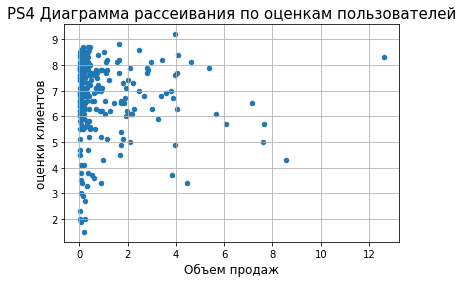

In [32]:
#построим диаграммы рассеивания по отзывам пользователей и критиков
df_ps4 = df.query("platform == 'PS4'")
df_ps4.plot(x = 'sum_sales', y = 'user_score', kind = 'scatter', grid = True)
plt.title('PS4 Диаграмма рассеивания по оценкам пользователей', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки клиентов',fontsize=12)
plt.show()

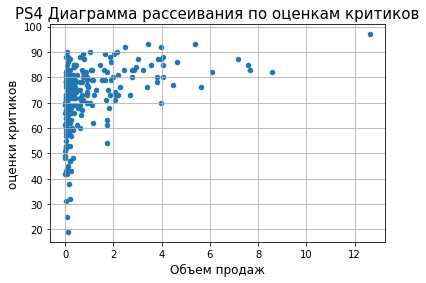

In [33]:
df_ps4.plot(x = 'sum_sales', y = 'critic_score', kind = 'scatter', grid = True)
plt.title('PS4 Диаграмма рассеивания по оценкам критиков', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки критиков',fontsize=12)
plt.show()

In [34]:
#посмотрим на коэффициенты корреляции
df_ps4['sum_sales'].corr(df_ps4['user_score'])

-0.031957110204556376

In [35]:
df_ps4['sum_sales'].corr(df_ps4['critic_score'])

0.406567902061781

*По диаграммам рассеивания и коэффициентам корреляции можно сделать вывод:*

*- оценки пользователей не влияют на показатель продаж. Корреляция очень слабая 0.03;*

*- оценки критиков частично влияют на показатель продаж. Корреляции слабая 0.4.*


#### 6. Соотнесите выводы с продажами игр на других платформах.

*рассмотрим платформы XOne, 3DS, X360, PS3, WiiU*

In [36]:
df_xone = df.query("platform == 'XOne'")
df_3ds = df.query("platform == '3DS'")
df_x360 = df.query("platform == 'X360'")
df_ps3 = df.query("platform == 'PS3'")
df_wiiu = df.query("platform == 'WiiU'")

**Платформа XOne**

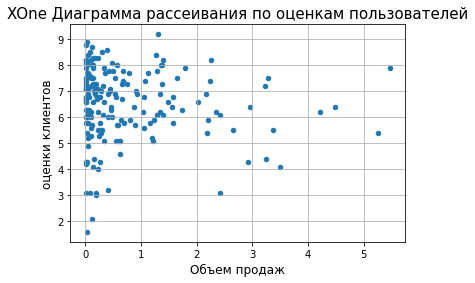

In [37]:
df_xone.plot(x = 'sum_sales', y = 'user_score', kind = 'scatter', grid = True)
plt.title('XOne Диаграмма рассеивания по оценкам пользователей', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки клиентов',fontsize=12)
plt.show()

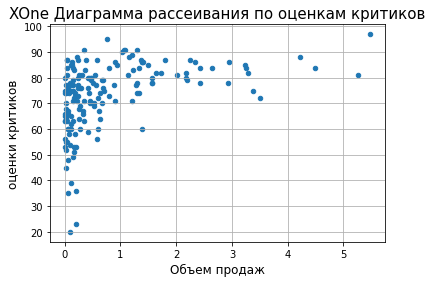

In [38]:
df_xone.plot(x = 'sum_sales', y = 'critic_score', kind = 'scatter', grid = True)
plt.title('XOne Диаграмма рассеивания по оценкам критиков', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки критиков',fontsize=12)
plt.show()

In [39]:
df_xone['sum_sales'].corr(df_xone['user_score'])

-0.06892505328279412

In [40]:
df_xone['sum_sales'].corr(df_xone['critic_score'])

0.41699832800840175

*Сравнивнивая результаты у платформ PS4 и XOne, видим похожие графики и коэффициенты. Выводы можно сделать схожие:*

*- оценки пользователей не влияют на показатель продаж. Корреляция очень слабая 0.06;*

*- оценки критиков частично влияют на показатель продаж. Корреляции слабая 0.41.*


**Платформа 3DS**

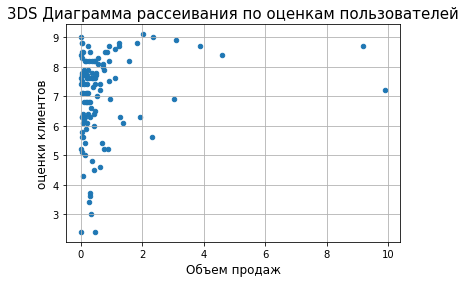

In [41]:
df_3ds.plot(x = 'sum_sales', y = 'user_score', kind = 'scatter', grid = True)
plt.title('3DS Диаграмма рассеивания по оценкам пользователей', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки клиентов',fontsize=12)
plt.show()

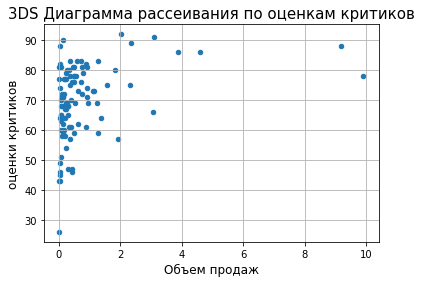

In [42]:
df_3ds.plot(x = 'sum_sales', y = 'critic_score', kind = 'scatter', grid = True)
plt.title('3DS Диаграмма рассеивания по оценкам критиков', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки критиков',fontsize=12)
plt.show()

In [43]:
df_3ds['sum_sales'].corr(df_3ds['user_score'])

0.19758263411038596

In [44]:
df_3ds['sum_sales'].corr(df_3ds['critic_score'])

0.32080286953607845

*Сравнивнивая результаты у платформ PS4 и 3DS, тоже видим похожие графики и коэффициенты. Выводы можно сделать схожие:*

*- оценки пользователей не влияют на показатель продаж. Корреляция очень слабая 0.19;*

*- оценки критиков частично влияют на показатель продаж. Корреляции слабая 0.32.*

**Платформа X360**

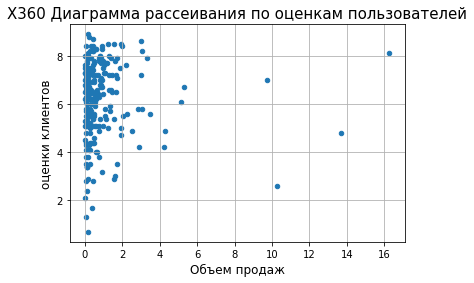

In [45]:
df_x360.plot(x = 'sum_sales', y = 'user_score', kind = 'scatter', grid = True)
plt.title('X360 Диаграмма рассеивания по оценкам пользователей', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки клиентов',fontsize=12)
plt.show()

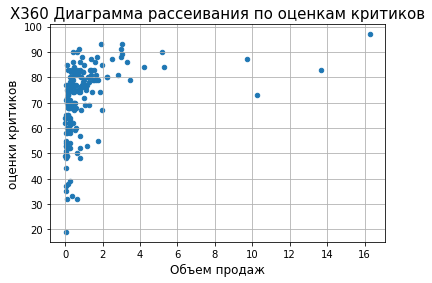

In [46]:
df_x360.plot(x = 'sum_sales', y = 'critic_score', kind = 'scatter', grid = True)
plt.title('X360 Диаграмма рассеивания по оценкам критиков', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки критиков',fontsize=12)
plt.show()

In [47]:
df_x360['sum_sales'].corr(df_x360['user_score'])

0.0061639786462133256

In [48]:
df_x360['sum_sales'].corr(df_x360['critic_score'])

0.36057348885073365

*Сравнивнивая результаты у платформ PS4 и X360, тоже видим похожие графики и коэффициенты. Выводы можно сделать схожие:*

*- оценки пользователей не влияют на показатель продаж. Корреляция очень слабая 0.006;*

*- оценки критиков частично влияют на показатель продаж. Корреляции слабая 0.36.*

**Платформа PS3**

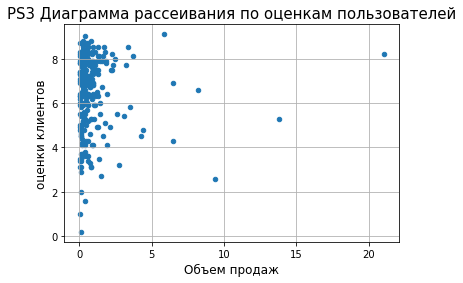

In [49]:
df_ps3.plot(x = 'sum_sales', y = 'user_score', kind = 'scatter', grid = True)
plt.title('PS3 Диаграмма рассеивания по оценкам пользователей', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки клиентов',fontsize=12)
plt.show()

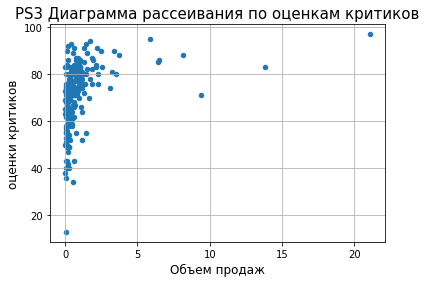

In [50]:
df_ps3.plot(x = 'sum_sales', y = 'critic_score', kind = 'scatter', grid = True)
plt.title('PS3 Диаграмма рассеивания по оценкам критиков', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки критиков',fontsize=12)
plt.show()

In [51]:
df_ps3['sum_sales'].corr(df_ps3['user_score'])

-0.005143522887113828

In [52]:
df_ps3['sum_sales'].corr(df_ps3['critic_score'])

0.3314972592629587

*Сравнивнивая результаты у платформ PS4 и PS3, тоже видим похожие графики и коэффициенты. Выводы можно сделать схожие:*

*- оценки пользователей не влияют на показатель продаж. Корреляция очень слабая 0.005;*

*- оценки критиков частично влияют на показатель продаж. Корреляции слабая 0.33.*

**Платформа WiiU**

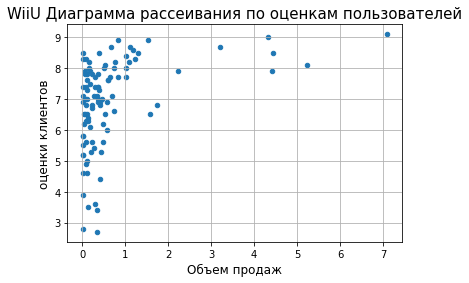

In [53]:
df_wiiu.plot(x = 'sum_sales', y = 'user_score', kind = 'scatter', grid = True)
plt.title('WiiU Диаграмма рассеивания по оценкам пользователей', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки клиентов',fontsize=12)
plt.show()

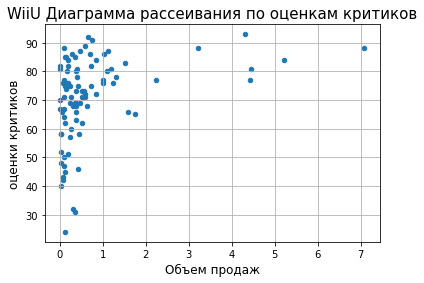

In [54]:
df_wiiu.plot(x = 'sum_sales', y = 'critic_score', kind = 'scatter', grid = True)
plt.title('WiiU Диаграмма рассеивания по оценкам критиков', fontsize=15)
plt.xlabel('Объем продаж', fontsize=12)
plt.ylabel('оценки критиков',fontsize=12)
plt.show()

In [55]:
df_wiiu['sum_sales'].corr(df_wiiu['user_score'])

0.4002190202148617

In [56]:
df_wiiu['sum_sales'].corr(df_wiiu['critic_score'])

0.3483797601201749

*Сравнивнивая результаты у платформ PS4 и WiiU, тоже видим похожие графики и коэффициенты. Выводы можно сделать схожие:*

*- оценки пользователей не влияют на показатель продаж. Корреляция слабая 0.4;*

*- оценки критиков частично влияют на показатель продаж. Корреляции слабая 0.34.*

*Рассмотрев еще 5 платформ можно сказать, что выводы по каждой платформе схожие. Корреляции слабо выражены. Диаграммы рассеивания похожи. Это говорит о том, что оценки пользователей и критиков, слабо влиют на продажу игр на разные платформы*



#### 7. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

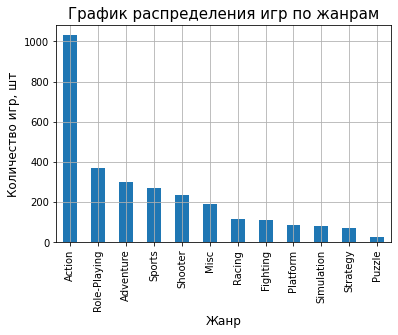

In [57]:
df.value_counts('genre').plot(kind = 'bar', grid = True)
plt.title('График распределения игр по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество игр, шт',fontsize=12)
plt.show()

*топ-5 популярных жанров за последние 5 лет это action, role-playing, adventure, sports, shooter.*

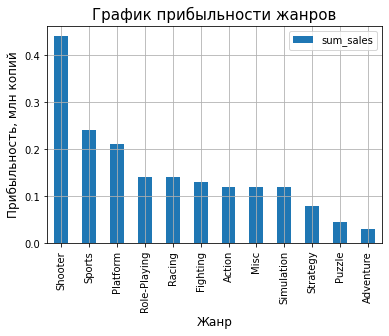

In [58]:
#составим сводную таблицу и по ней построим barplot
df.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median').sort_values(by = 'sum_sales', ascending = False).plot(kind = 'bar', grid = True)
plt.title('График прибыльности жанров', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Прибыльность, млн копий',fontsize=12)
plt.show()

*топ-5 самых прибыльных жанров это shooter, sports, platform, role-playing, racing.*

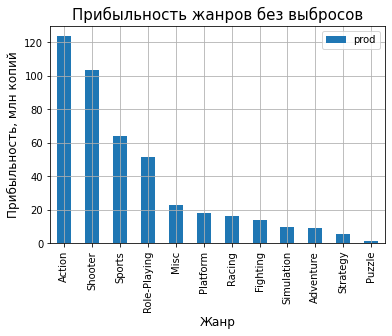

In [59]:
df_pop_genre = df.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = ['median', 'count'])
df_pop_genre.columns = ['median_sum_sales', 'count']
df_pop_genre['prod'] = df_pop_genre['median_sum_sales'] * df_pop_genre['count']
df_pop_genre.sort_values(by = 'prod', ascending = False).plot(y = 'prod', kind = 'bar', grid = True)
plt.title('Прибыльность жанров без выбросов', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Прибыльность, млн копий',fontsize=12)
plt.show()

*По графику прибыльности жанров без выбросов, можно сказать что:*

*- прибыльными будут жанры Action, Shooter, Sports;*

*- низкоприбыльными/убыточными будут жанры Action, Shooter, Sports.*

**В исследовательской части мы:**

1. посмотрели, сколько игр выпускалось каждый год:

    - пик вышел на 2006-2011 года - более 1000 игр в год;

    - актуальными для нас годами, мы выбрали последние 5 лет - 2012 - 2016 года.
    
   

2. посмотрели, как менялись продажи по платформам за последние 5 лет:

    - топ-5 самых актуальных платформ оказались - 'PS4', 'PS3', 'X360', '3DS', 'XOne';
    
    - "жизнь" платформ определили как 3-4 года с момента выпуска;
    
    
3. Определили какие платформы лидируют по продажам:

    - лидерами оказались платформы - 'PS4', 'XOne';
    
    - все платформы прошли свой "пик" и продажи стремятся вниз.
    
    
4. Построили диграмму размаха по топ-10 платформ:

    - все платформы имеют выбросы;
    
    - выбросы мы определили как самые "ожидаемые" игры на данных платформах.
    
    *по данным за последние 5 лет, **лучшим считается X360, его медиана и 75% процентиль имеет наибольшее значение**. Далее можно отметить топ-5 платформ:*

    - с наибольшей медианой - это Xone, WiiU, PS4, PS3;
    - с наибольшим 75% процентилем - PS4, XOne, Wii, PS3.
    
    
5. Посмотрели, как оценки критиков и пользователей влияют на продажи по платформам:

    - взяли лидера среди платформ - PS4, построили по ним диаграммы рассеивания(продажи - оценки критиков, продажи - оценки пользователей);
    
    - посчитали коэффициент корреляции(продажи - оценки критиков, продажи - оценки пользователей);
    
    - оценки критиков не влияют на показатель продажи. Корреляция слабая;
    
    - оценки пользователей не влияют на показатель продаж. Корреляция очень слабая.
    
    
6. Оценили, как оценки критиков влияют на продажи других плафторм:

    - выводы с предыдущей части оказались актуальными и для других платформ.
    
    
7. Посмотрели, как игры разделяются по жанрам:
    
    - топ-5 популярных жанров за последние 5 лет оказались - action, role-playing, adventure, sports, shooter;
    
    - топ-5 самых прибыльных жанров оказались - shooter, sports, racing, platform, role-playing;
    
    По графику прибыльности жанров без выбросов, можно сказать что:
    
    - прибыльными будут жанры Action, Shooter, Sports;

    - низкоприбыльными/убыточными будут жанры Action, Shooter, Sports.

### Шаг 4. Портрет пользователя каждого региона

**Самые популярные платформы (топ-5) в каждом регионе**

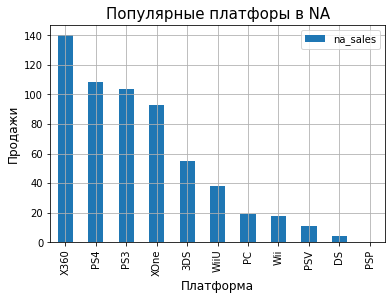

In [60]:
#Пользователь Северной Америки
df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).plot(kind = 'bar', grid = True)
plt.title('Популярные платфоры в NA', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

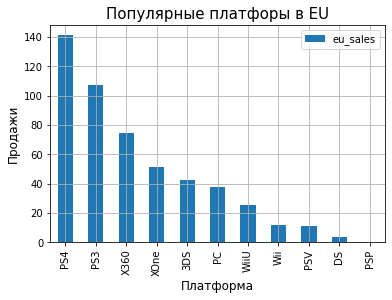

In [61]:
#Пользователь Европы
df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).plot(kind = 'bar', grid = True)
plt.title('Популярные платфоры в EU', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

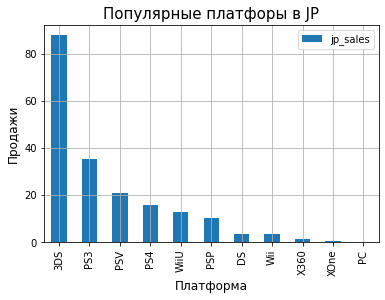

In [62]:
#Пользователь Японии
df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).plot(kind = 'bar', grid = True)
plt.title('Популярные платфоры в JP', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Самые популярные жанры (топ-5) в каждом регионе**

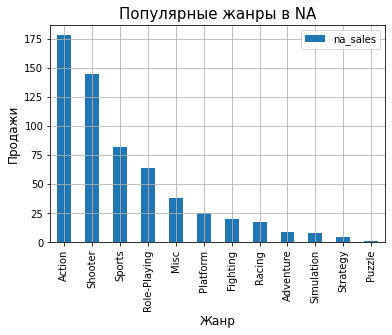

In [63]:
#Пользователь Северной Америки
df.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).plot(kind = 'bar', grid = True)
plt.title('Популярные жанры в NA', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

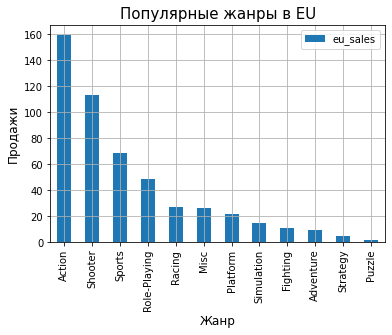

In [64]:
#Пользователь Европы
df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).plot(kind = 'bar', grid = True)
plt.title('Популярные жанры в EU', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

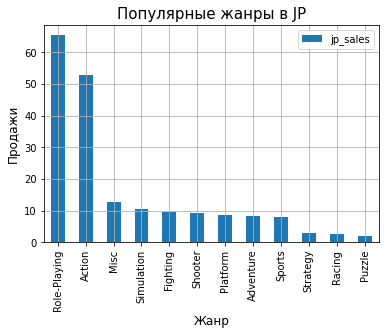

In [65]:
#Пользователь Японии
df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).plot(kind = 'bar', grid = True)
plt.title('Популярные жанры в JP', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

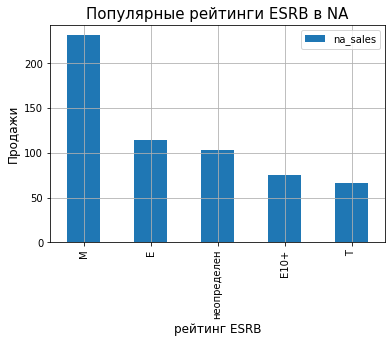

In [66]:
#Пользователь Северной Америки
df.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).plot(kind = 'bar', grid = True)
plt.title('Популярные рейтинги ESRB в NA', fontsize=15)
plt.xlabel('рейтинг ESRB', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

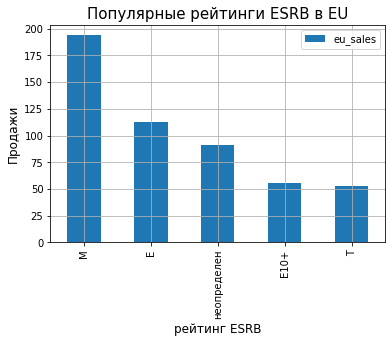

In [67]:
#Пользователь Европы
df.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).plot(kind = 'bar', grid = True)
plt.title('Популярные рейтинги ESRB в EU', fontsize=15)
plt.xlabel('рейтинг ESRB', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

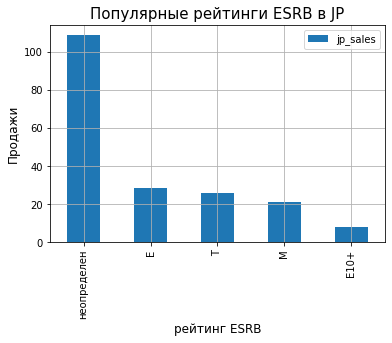

In [68]:
#Пользователь Японии
df.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).plot(kind = 'bar', grid = True)
plt.title('Популярные рейтинги ESRB в JP', fontsize=15)
plt.xlabel('рейтинг ESRB', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Портреты пользователей разных регионов по данным за последие 5 лет:**
1. Северная Америка:
    - Топ-5 платформ: X360, PS4, PS3, XOne, 3DS.
    - Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc.
    - В Северной Америке предпочитают рейтинг ESRB, без учета "неопределен", рейтин M
2. Европа:
    - Топ-5 платформ: PS4, PS3, X360, XOne, 3DS.
    - Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc.
    - В Европе предпочитают рейтинг ESRB, без учета "неопределен", рейтин M
3. Япония:
    - Топ-5 платформ: 3DS, PS3, PS4, X360, XOne.
    - Топ-5 жанров: Role-Playing, Action, Simulation, Shooter, , Fighting.
    - В Японии предпочитают рейтинг ESRB, без учета "неопределен", рейтин E
    
*Портреты пользователей схожи в Северной Америке и Европе, портрет пользователя Японии отличается от остальных как по жанру игр, так и по платформам и даже рейтингу ESRB*


### Шаг 5. Проверьте гипотезы.

Для проверки гипотез необходимо избавиться от пропусков в user_score

In [69]:
df = df.dropna(subset = ['user_score'])

In [70]:
df.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       234
user_score           0
rating               0
sum_sales            0
dtype: int64

**Первая гипотеза:**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Средние (user_score) пользователей "XOne" = Средние (user_score) пользователей "PC"`

H_a: Средние (user_score) пользователей "XOne" ≠ Средние (user_score) пользователей "PC"`

alpha = 0.05

In [71]:
from scipy import stats as st

In [72]:
xbox_one = df[df['platform'] == 'XOne']['user_score']
pc = df[df['platform'] == 'PC']['user_score']

In [73]:
results = st.ttest_ind(
    xbox_one, 
    pc, equal_var = False
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вторая гипотеза:**

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0: Средние (user_score) пользователей жанра "Action" = Средние (user_score) пользователей жанра "Sports"`

H_a:Средние (user_score) пользователей жанра "Action" ≠ Средние (user_score) пользователей жанра "Sports"

alpha = 0.05

In [74]:
action = df[df['genre'] == 'Action']['user_score']
sports = df[df['genre'] == 'Sports']['user_score']

In [75]:
results = st.ttest_ind(
    action, 
    sports, equal_var = False
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.24307776572644e-20
Отвергаем нулевую гипотезу


**Были проверены 2 гипотезы. По каждой были выдвинуты нулевые и альтернатывные гипотезы.**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

    - Нулевая гиптеза:  Средние оценки пользователей "XOne" равны средним оценкам пользователей "PC".
    - Альтернативная гипотеза: Средние оценки пользователей "XOne" не равны средним оценкам пользователей "PC".
    
Не удалось отвергнуть нулевую гипотезу.
    
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
    - Нулевая гиптеза:  Средние оценки пользователей жанра "Action" равны средним оценкам пользователей "Sports".
    - Альтернативная гипотеза: Средние оценки пользователей жанра "Action" не равны средним оценкам пользователей "Sports".

Нулевая гипотеза была отвергнута.
    
    

### Шаг 6. Общий вывод.

**В этом проекте были предоставлены о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год. Данные были до 2016 года, включая его.**

**На этапе ознакомления с данными:**
1. Импрортировали библиотеки pandas, matplotlib, numpy.
2. Изучили первые 15 строк и основную информацию датафрейма.
3. Построили общие гистограммы для всех числовых столбцов таблицы.
4. Проверили датасет на дубликаты.

**На этапе предобработки данных мы:**

1. Перевели названия столбцов в нижний регистр
2. Изменили типы данных в столбцах:

    -year_of_release в int64. Так как в столбце был пропуски, перевод в обычный int вызывал ошибку;
 
    -user_score в float, однако в этом столбце были значения "tbd". Они означают, что человек еще в раздумьях какую оценку нужно поставить. Поэтому значения "tbd" были заменены на NaN.
3. Обработали пропуски в столбцах:

    -name, genre, year_of_release были удалены, так как точно их заполнить невозможно. Пропусков было немного, так что на точность данных это не повлияет;
    
    -заполнение оценок пользователей и критиков в user_score, critic_score добавит "шума" в данные, поэтому пропуски в них мы сохранили.
    
    -в столбце rating удалили очень редкие значения, которые составляют пренебрежимо малую долю в данных;
    
    -rating заполнили значением "неопределен", так как возрастную группу определить точно нельзя.
    
4. Создали столбец sum_sales в котором находится суммарная продажа во всех регионах.

**В исследовательской части мы:**


1. посмотрели, сколько игр выпускалось каждый год:

    - пик вышел на 2006-2011 года - более 1000 игр в год;

    - актуальными для нас годами, мы выбрали последние 5 лет - 2012 - 2016 года.
    
   

2. посмотрели, как менялись продажи по платформам за последние 5 лет:

    - топ-5 самых актуальных платформ оказались - 'PS4', 'PS3', 'X360', '3DS', 'XOne';
    
    - "жизнь" платформ определили как 3-4 года с момента выпуска;
    
    
3. Определили какие платформы лидируют по продажам:

    - лидерами оказались платформы - 'PS4', 'XOne';
    
    - все платформы прошли свой "пик" и продажи стремятся вниз.
    
    
4. Построили диграмму размаха по топ-10 платформ:

    - все платформы имеют выбросы;
    
    - выбросы мы определили как самые "ожидаемые" игры на данных платформах.
    
    *по данным за последние 5 лет, **лучшим считается X360, его медиана и 75% процентиль имеет наибольшее значение**. Далее можно отметить топ-5 платформ:*

    - с наибольшей медианой - это Xone, WiiU, PS4, PS3;
    - с наибольшим 75% процентилем - PS4, XOne, Wii, PS3.
    
    
5. Посмотрели, как оценки критиков и пользователей влияют на продажи по платформам:

    - взяли лидера среди платформ - PS4, построили по ним диаграммы рассеивания(продажи - оценки критиков, продажи - оценки пользователей);
    
    - посчитали коэффициент корреляции(продажи - оценки критиков, продажи - оценки пользователей);
    
    - оценки критиков не влияют на показатель продажи. Корреляция слабая;
    
    - оценки пользователей не влияют на показатель продаж. Корреляция очень слабая.
    
    
6. Оценили, как оценки критиков влияют на продажи других плафторм:

    - выводы с предыдущей части оказались актуальными и для других платформ.
    
    
7. Посмотрели, как игры разделяются по жанрам:
    
    - топ-5 популярных жанров за последние 5 лет оказались - action, role-playing, adventure, sports, shooter;
    
    - топ-5 самых прибыльных жанров оказались - shooter, sports, racing, platform, role-playing;
    
    По графику прибыльности жанров без выбросов, можно сказать что:
    
    - прибыльными будут жанры Action, Shooter, Sports;

    - низкоприбыльными/убыточными будут жанры Action, Shooter, Sports.

**В аналитической части:**
1. Составили портреты пользователей по регионам NA, EU, JP за последние 5 лет:
    1. Северная Америка:
        - Топ-5 платформ: X360, PS4, PS3, XOne, 3DS.
        - Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc.
        - В Северной Америке предпочитают рейтинг ESRB, без учета "неопределен", рейтин M
    2. Европа:
        - Топ-5 платформ: PS4, PS3, X360, XOne, 3DS.
        - Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc.
        - В Европе предпочитают рейтинг ESRB, без учета "неопределен", рейтин M
    3. Япония:
        - Топ-5 платформ: 3DS, PS3, PS4, X360, XOne.
        - Топ-5 жанров: Role-Playing, Action, Simulation, Shooter, , Fighting.
        - В Японии предпочитают рейтинг ESRB, без учета "неопределен", рейтин E.
    *Портреты пользователей схожи в Северной Америке и Европе, портрет пользователя Японии отличается от остальных как по жанру игр, так и по платформам и даже рейтингу ESRB*

**На этапе проверки гипотез:**

    Для проверки гипотез необходимо избавиться от пропусков в user_score.
    
    **Были проверены 2 гипотезы. По каждой были выдвинуты нулевые и альтернатывные гипотезы.**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

    - Нулевая гиптеза:  Средние оценки пользователей "XOne" равны средним оценкам пользователей "PC".
    - Альтернативная гипотеза: Средние оценки пользователей "XOne" не равны средним оценкам пользователей "PC".
    
*Не получилось отвергнуть нулевую гипотезу*

    
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
    - Нулевая гиптеза:  Средние оценки пользователей жанра "Action" равны средним оценкам пользователей "Sports".
    - Альтернативная гипотеза: Средние оценки пользователей жанра "Action" не равны средним оценкам пользователей "Sports".

*Нулевая гипотеза была отвергнута*
    
***Подводя итог:***
В 2017 году в игровой индустрии:
    - самыми актуальными платформами будут PS4, Xbox One. Все остальные платформы прошли свой "пик" и продажи стремятся вниз;
    - самыми популярными жанрами будут action, role-playing, sports, shooter, adventure;
    - самыми продаваемыми будут жанры action, shooter, sport.
    - от организации ESRB категория M будет более продаваемая, чем остальные.